In [2]:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

# Introducción

En el presente Notebook, vamos a realizar el Análisis Exploratorio de Datos en un dataframe que contiene información sobre venta de propiedades publicadas en Capital Federal.

El dataframe importado tiene 26 columnas, cada una con la siguiente información:
- Unnamed 0: Número de identificación de la publicación
- id: Código de la publicación
- ad_type: Tipo de publicacion
- start_date: Fecha de inicio de la publicacion
- end_date: Fecha de finalización de la publicacion
- created_on: Fecha creada de la publicacion
- lat: Coordenada de la propiedad
- lon: Coordenada de la propiedad
- l1: País de la propiedad
- l2: Ciudad de la propiedad
- l3: Barrio de la propiedad
- l4: Sub-barrio de la propiedad
- l5: Ubicación 5
- l6: Ubicación 6
- rooms: Cantidad de ambientes de la propiedad
- bedrooms: Cantidad de dormitorios de la propiedad
- bathrooms: Cantidad de baños de la propiedad
- surface_total: Superficie total
- surface_covered: Superficie cubierta
- precio: Precio publicado
- currency: Divisa
- price_period: Período del precio
- title: Título de la publicación
- description: Descripción de la propiedad
- property_type: Tipo de propiedad
- operation_type: Tipo de operación

In [7]:
#Importamos el dataframe y verificamos las primeras filas

capital_df = pd.read_csv('properati_capital.csv')
capital_df.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,63934,MlnOILxnUwm3KXFnNyOJig==,Propiedad,2020-07-06,2021-04-07,2020-07-06,-34.618041,-58.475124,Argentina,Capital Federal,...,1.0,NaN,NaN,89000.0,USD,NaN,Galicia 2800 Depto 2 Ambientes Con Balcón Vill...,XINTEL(JUM-JUM-313) \n\nExcelente departament...,Departamento,Venta
1,660204,FiY707h094LvsqOGHohO9Q==,Propiedad,2020-07-17,9999-12-31,2020-07-17,-34.620686,-58.453972,Argentina,Capital Federal,...,2.0,NaN,NaN,190000.0,USD,NaN,DEPARTAMENTO A ESTRENAR AL FRENTE CON COCHERA,EXCELENTE DPTO A ESTRENAR AL FRENTE CON COCHER...,Departamento,Venta
2,961496,VKAgMtgXuRfeD2XHnLPWNQ==,Propiedad,2020-06-19,2020-12-03,2020-06-19,-34.590569,-58.425215,Argentina,Capital Federal,...,2.0,98.0,68.0,360000.0,USD,NaN,Excelente departamento 4 ambientes con terraza...,Patio El Salvador . inicio de obra nmarzo 2019...,Departamento,Venta
3,292569,H56oekWpzEOKT5aXM43WLA==,Propiedad,2021-02-24,2021-03-01,2021-02-24,-34.577440,-58.485041,Argentina,Capital Federal,...,1.0,118.0,96.0,285000.0,USD,NaN,Venta depto 4 ambientes/terraza en V. Urquiza,Corredor Responsable: MARIANO AUFSEHER - CPI 4...,Departamento,Venta
4,278737,FPPomZ4bizdYOzH9KlsLDg==,Propiedad,2020-11-17,2021-04-13,2020-11-17,-34.615851,-58.439566,Argentina,Capital Federal,...,1.0,61.0,52.0,145000.0,USD,NaN,Departamento de 2 ambientes c terraza a estrenar,Corredor Responsable: MARCELO GRUNBAUM - CMCPS...,Departamento,Venta


In [8]:
#Verificamos las dimensiones del dataframe

np.shape(capital_df)

(38656, 26)

# Preprocesamiento de los Datos

In [9]:
capital_df.drop(labels=['id','ad_type','start_date','end_date','l1','l2','l5','l6','currency','price_period','title','description','operation_type'], axis=1, inplace = True)
capital_df['surface_total'].fillna(capital_df['surface_total'].mean(), inplace = True)
capital_df['surface_covered'].fillna(capital_df['surface_covered'].mean(), inplace = True)
capital_df['rooms'].fillna(capital_df['rooms'].median(), inplace = True)
capital_df.drop_duplicates(subset='Unnamed: 0', inplace=True, keep='last')
capital_df = capital_df.loc[capital_df.price < 350000]

In [10]:
np.shape(capital_df)

(27493, 13)

# Análisis Exploratorio de los Datos

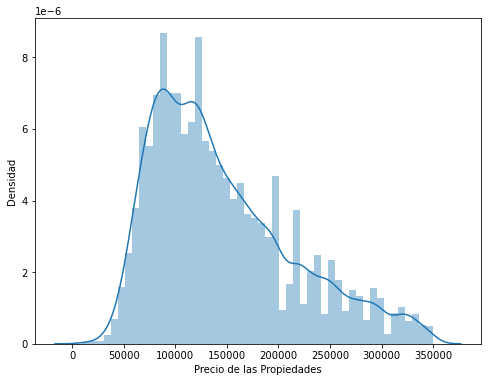

In [11]:
#Analicemos ahora la distribución de la variable "price"

plt.figure(figsize=(8,6))
sns.distplot(capital_df.price)
plt.xlabel("Precio de las Propiedades")
plt.ylabel("Densidad")
plt.show()

<AxesSubplot:>

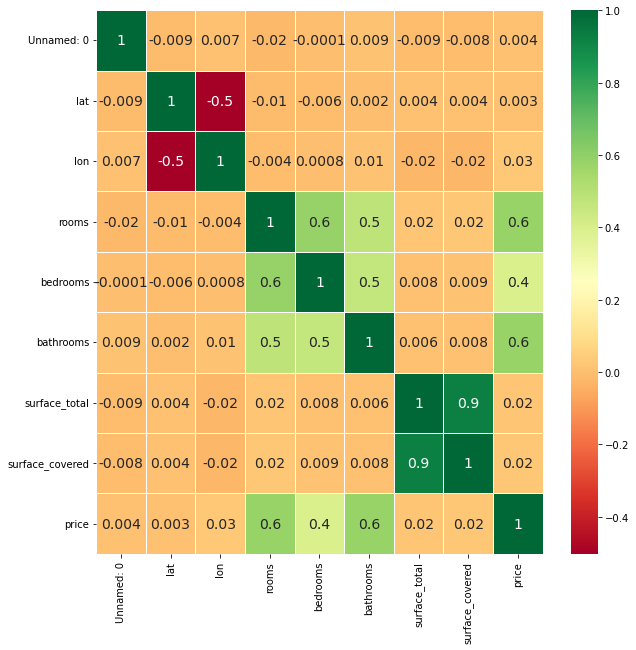

In [12]:
#Con un mapa de correlación, vamos a verificar si existe linealidad entre algún par de variables del conjunto.

corrmat = capital_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(capital_df.corr(),annot=True,cmap="RdYlGn",annot_kws={'fontsize' : 14},fmt=".1g",linewidth=1)

**Comentario:** Obviando la correlación de la variable *"rooms"* con *"bedrooms"* y *"bathrooms"*, vemos que hay cierta relación entre el precio del alojamiento y la cantidad de ambientes, lo cual suena lógico. Algo que sorprende es que la superficie no tenga relevancia a la hora de establecer el precio de la propiedad.

In [13]:
#Observemos información estadística más detallada de las variables del dataframe.

capital_df.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,27493.000000,26096.000000,26096.000000,27493.000000,21946.000000,25764.000000,27493.000000,27493.000000,27493.000000
mean,514257.872804,-34.595256,-58.454175,2.351944,1.640390,1.289901,114.286910,88.193123,145885.311279
std,295757.472206,0.388747,0.378897,1.085475,1.454966,0.534699,1122.902269,752.126312,68983.323910
min,451.000000,-38.453998,-81.807577,1.000000,0.000000,1.000000,10.000000,1.000000,10000.000000
25%,262858.000000,-34.618593,-58.466748,2.000000,1.000000,1.000000,52.000000,46.000000,92000.000000
50%,526945.000000,-34.600262,-58.440069,2.000000,1.000000,1.000000,100.000000,85.000000,129000.000000
75%,765547.000000,-34.581761,-58.413265,3.000000,2.000000,2.000000,123.681431,94.367801,185000.000000
max,999791.000000,26.217375,-55.496357,22.000000,153.000000,9.000000,140380.000000,63660.000000,349900.000000


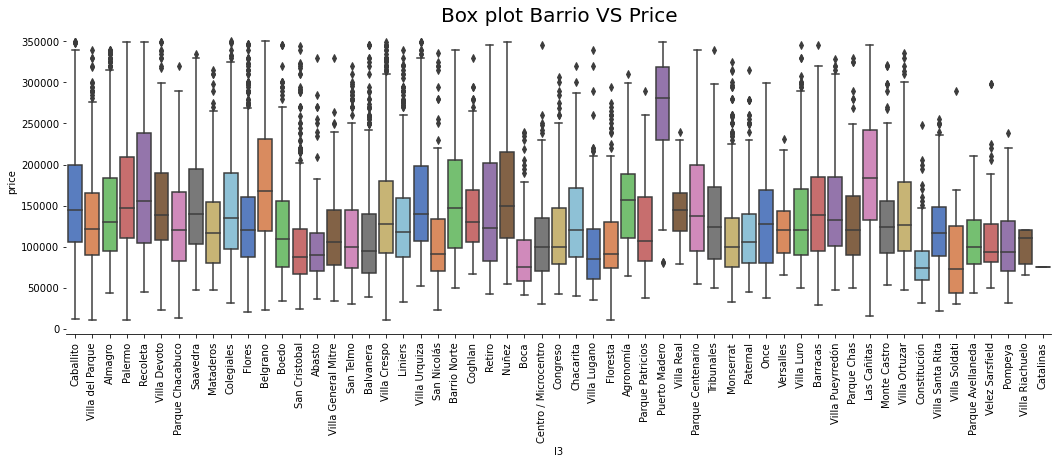

In [14]:
#Vamos a realizar un boxplot del precio discriminando por barrio donde está alojada la propiedad

g = sns.catplot(x="l3", y='price', data=capital_df, kind="box", height = 5, aspect=3, palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("price")
plt.title('Box plot Barrio VS Price',size = 20)
plt.show()

**Comentario:** Del precedente gráfico podemos ver algunos datos relevantes.
- *Precios más altos:* El barrio con mayor media de precio es *Puerto Madero* seguido por *Las Cañitas*, y también tiene altos precios *Recoleta*, pero para este último podemos ver que la variedad de precios es muy alta, teniendo una media relativamente normal.
- *Precios más bajos:* Como los barrios con precios más bajos, encontramos a *Constitución*, *Villa Soldati* y *Boca*

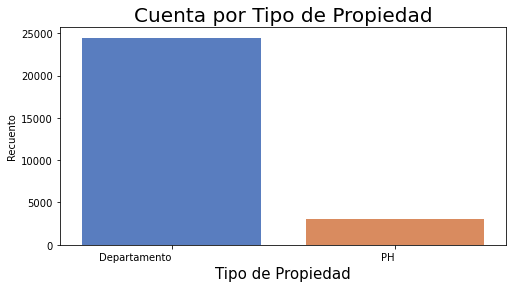

In [16]:
#Ahora vamos a contar la cantidad de registros existentes para cada tipo de propiedad

plt.figure(figsize=(8,4))
g = sns.countplot(x='property_type',data=capital_df, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="right")
plt.title('Cuenta por Tipo de Propiedad',size = 20)
plt.xlabel("Tipo de Propiedad", size = 15)
plt.ylabel("Recuento")
plt.show()

Text(0.5, 1.0, 'Precio por tipo de propiedad')

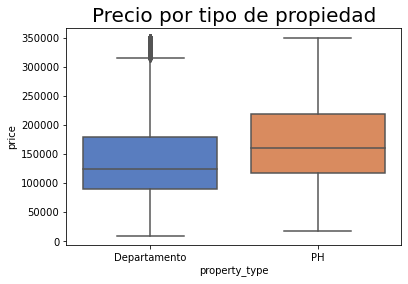

In [17]:
#Y, siguiendo con esto, realizamos un boxplot para verificar si la media varía para los distintos tipos.

sns.boxplot(data=capital_df,
                x="property_type",
                y="price",
                palette = "muted")
plt.title('Precio por tipo de propiedad',size = 20)

**Comentario:** Efectivamente, vemos que la media del precio de los PentHouse es mayor a la de los departamentos, si bien hay departamentos que cuentan con valores de precio mayores, pero que son considerados Outliers y puede estar relacionado al barrio en el que se sitúan.

In [18]:
#Veamos ahora la evolución de los precios a través del tiempo. Primero, verificamos el tipo de dato de la variable "created_on", fecha de publicación de la propiedad.

capital_df['created_on'].dtype

dtype('O')

In [19]:
#Como la variable está en formato object, vamos a pasarla al tipo fecha, con el formato Año-Mes-Día y, a continuación, creamos una columna que especifique el año de publicación y otra que especifique mes y año.

capital_df['created_on'] = pd.to_datetime(capital_df['created_on'], format='%Y/%m/%d')
capital_df['año'] = capital_df['created_on'].dt.to_period('Y')
capital_df['mes/año'] = capital_df['created_on'].dt.to_period('M')

In [20]:
capital_df.head()

,Unnamed: 0,created_on,lat,lon,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,año,mes/año
1,660204,2020-07-17,-34.620686,-58.453972,Caballito,NaN,3.0,2.0,2.0,123.681431,94.367801,190000.0,Departamento,2020,2020-07
4,278737,2020-11-17,-34.615851,-58.439566,Caballito,NaN,2.0,11.0,1.0,61.000000,52.000000,145000.0,Departamento,2020,2020-11
5,651086,2021-05-07,-34.606540,-58.497938,Villa del Parque,NaN,3.0,2.0,1.0,66.000000,58.000000,153000.0,Departamento,2021,2021-05
7,595777,2020-08-05,-34.608956,-58.424652,Almagro,NaN,3.0,2.0,1.0,84.000000,70.000000,165000.0,PH,2020,2020-08
8,426114,2021-02-18,-34.575155,-58.432262,Palermo,NaN,1.0,1.0,1.0,33.000000,33.000000,92000.0,Departamento,2021,2021-02


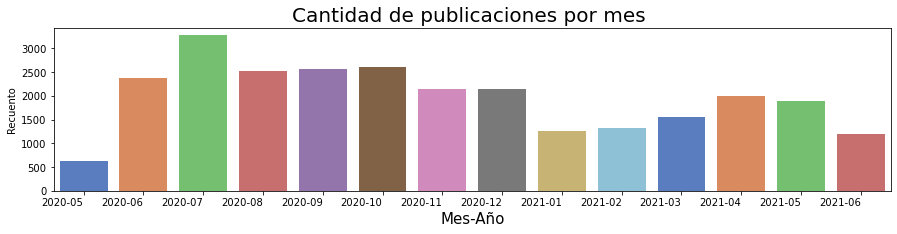

In [21]:
#Contamos la cantidad de publicaciones realizadas en cada mes.
#Ordenamos en una nueva variable el dataset para que figure mes ascendiente.
capital_df_sorted = capital_df.sort_values('mes/año')

plt.figure(figsize=(15,3))
g = sns.countplot(x='mes/año',data=capital_df_sorted, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="right")
plt.title('Cantidad de publicaciones por mes ',size = 20)
plt.xlabel("Mes-Año", size = 15)
plt.ylabel("Recuento")
plt.show()

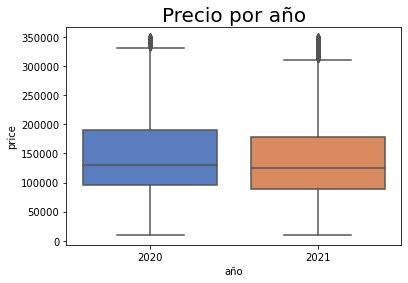

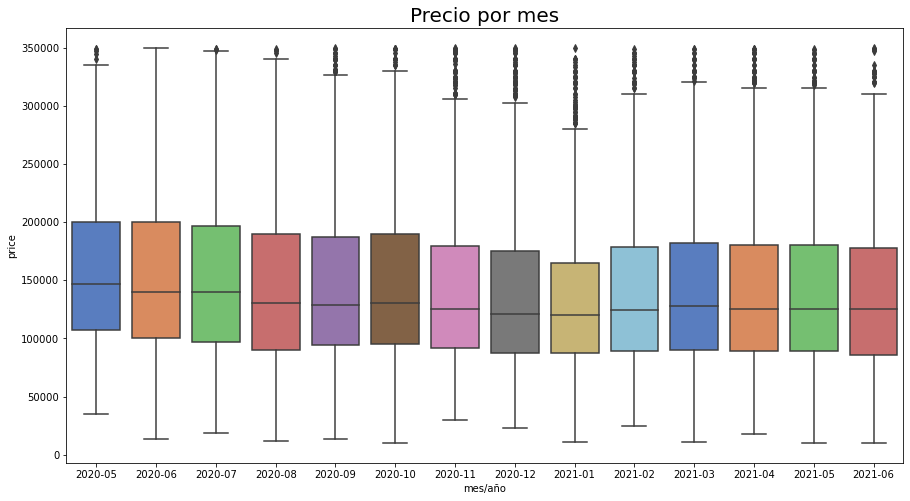

In [24]:
#Vamos a ver por un lado la media de los precios para cada año, y luego la media para cada mes, con el fin de observar si fue variando mes a mes.



sns.boxplot(data=capital_df,
                x="año",
                y="price",
                palette = "muted"),
plt.title('Precio por año',size = 20)
plt.show()


plt.figure(figsize=(15,8)),
sns.boxplot(data=capital_df_sorted,
                x="mes/año",
                y="price",
                palette = "muted"),
plt.title('Precio por mes',size = 20)
plt.show()

**Conclusión:** Resulta llamativo en el contexto argentino ver que la media de los precios vaya bajando, de acuerdo a la inflación que tenemos todos los años. Sin embargo, a lo largo de los años de pandemia, se vio una gran reducción en el precio de los alojamientos, y se ve reflejada dicha situación en los datos que tenemos a disposición.
                Incluso analizandolo año a año, si bien la cantidad de registros del 2020 es mucho superior, la media de precios del 2021 es menor.